In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc



In [4]:
data = pd.read_excel('project_3_train+test.xlsx', index_col='Unnamed: 0')

In [ ]:
train = data.iloc[:357]
test = data.iloc[357:]

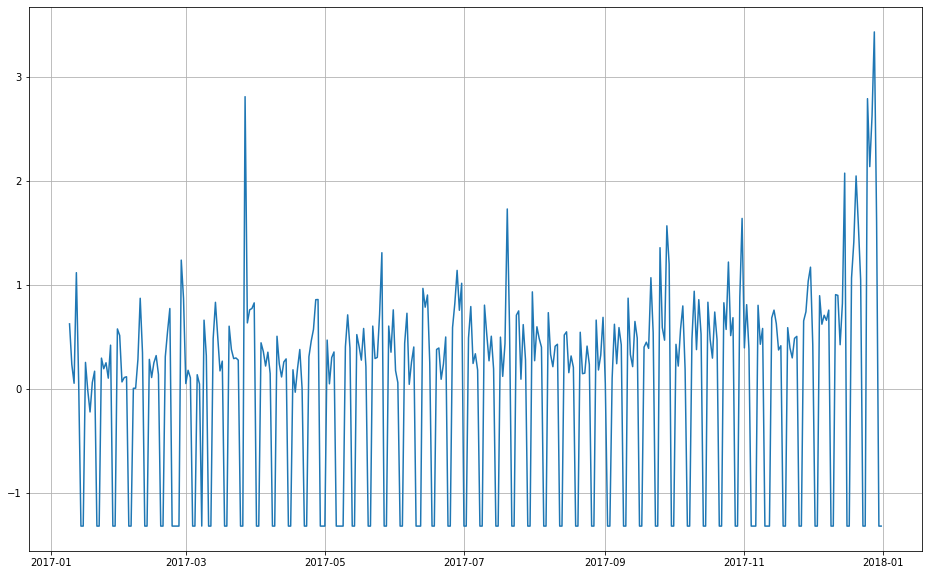

In [15]:
plt.figure(figsize=(16,10))
plt.plot(train)
plt.grid()
plt.show()

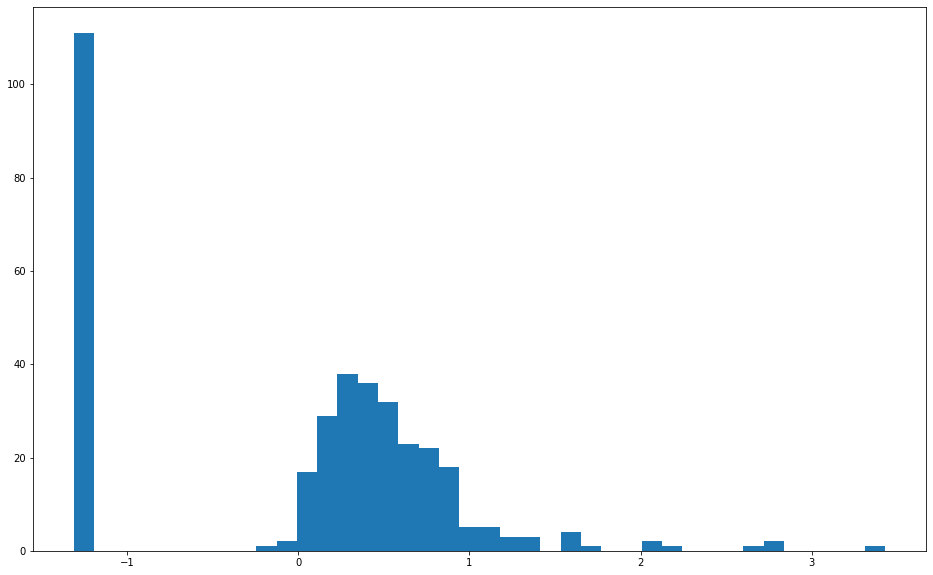

In [16]:
plt.figure(figsize=(16,10))
plt.hist(train.values, bins=40)
plt.show()

Столбец слева и сильнейшие коллебания в отрицательные значения говорят о том, что что-то не так.

Если заглянуть в файл и календарь, то можно увидеть, что это одно и то же значение и оно стоит на выходном дне.

__Этот вопросик надо обкашлять, потому что простым удалением тут не обойтись__

Пока рубанём по квантилям 0.5-0.95

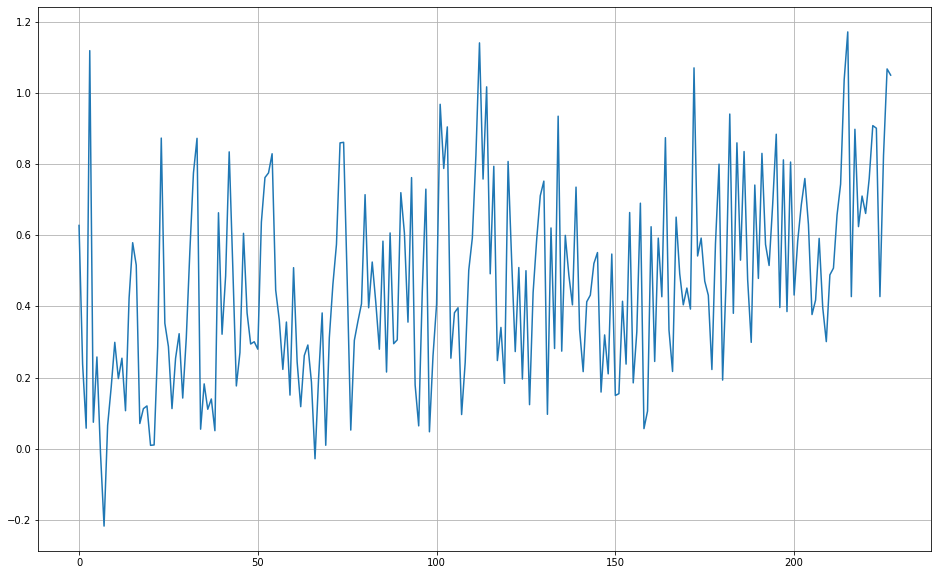

In [44]:
plt.figure(figsize=(16,10))
plt.plot(train['Target'].values[(train['Target'] < train['Target'].quantile(0.95)) & (train['Target'] > train['Target'].quantile(0.05))])
plt.grid()
plt.show()

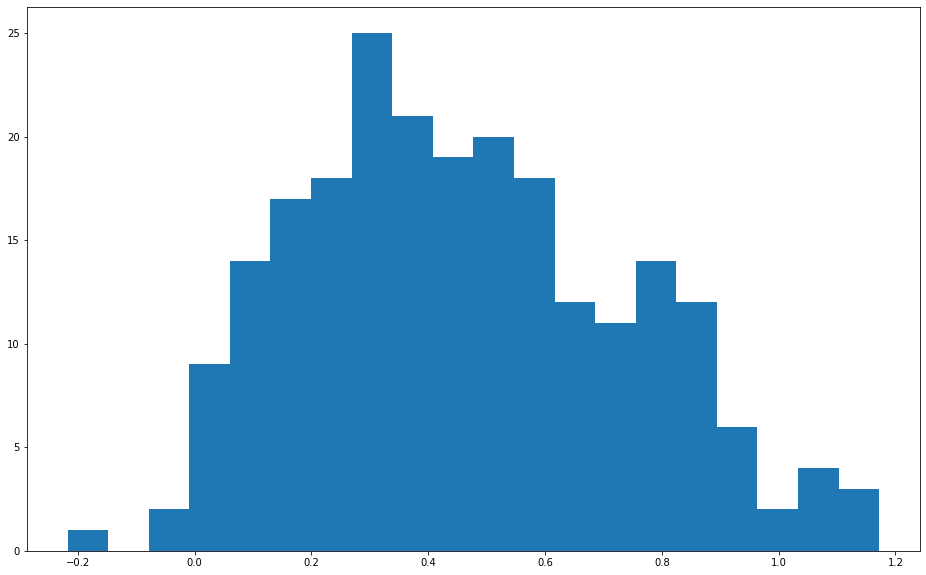

In [45]:
plt.figure(figsize=(16,10))
plt.hist(train['Target'].values[(train['Target'] < train['Target'].quantile(0.95)) & (train['Target'] > train['Target'].quantile(0.05))], bins=20)
plt.show()

# Feature engineering

In [33]:
train

,Target,quarter
2017-01-09,0.627938,1
2017-01-10,0.238050,1
2017-01-11,0.057763,1
2017-01-12,1.119530,1
2017-01-13,0.074451,1
...,...,...
2017-12-27,2.625104,4
2017-12-28,3.430774,4
2017-12-29,1.604701,4
2017-12-30,-1.313368,4


In [ ]:
train['quarter'] = train.index.quarter
test['quarter'] = test.index.quarter

train['month'] = train.index.month
test['month'] = test.index.month

train['week'] = train.index.week
test['week'] = test.index.week

train['weekday'] = train.index.weekday
test['weekday'] = test.index.weekday

False
False
False
False
False


# Бизнес-логика

# Anomaly detection

# Feature selection